In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import numpy as np
from scipy.stats import rankdata

In [2]:
# data = pd.read_csv('../main/log/mut_step_real.csv', names=["algo", "mut_step","experiment_id",  "dataset", "seed", "generation",
#                                         "training_fitness", "timing", "pop_node_count",
#                                         "test_fitness","elite_size", "log"])

In [3]:
# data.dataset.unique()

In [4]:
data = pd.read_csv('../main/log/mut_step_real_2.csv', names=["algo", "mut_step","experiment_id",  "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

In [5]:
data.mut_step.unique()

array(['(0, 62)', '(0, 10)', '(0, 100)', '(0, 0.1)', '(0, 1000)',
       '(0, 1)', '(0, 3)', '(103, 141)', '(0, 125.7)', '(0, 30)',
       '(0, 21.5)', '(2.3, 83)', '(0, 33.8)', '(0.5, 100)', '(0, 85)',
       '(0.4, 100)', '(0, 75)', '(0.25, 89000)', '(0, 775)'], dtype=object)

In [6]:
data_scaled = pd.read_csv('../main/log/mut_step_real_scaled_n.csv', names=["algo", "mut_step","experiment_id",  "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

In [7]:
data_scaled.head()

,algo,mut_step,experiment_id,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,elite_size,log
0,SLIM*1SIG,"(0, 62)",73d5a7a2-4a72-11ef-b512-049226d8b1cb,"yatch_(0, 1)",0,0,16.444743,0.075019,1490.0,15.840067,31,1
1,SLIM*1SIG,"(0, 62)",73d5a7a2-4a72-11ef-b512-049226d8b1cb,"yatch_(0, 1)",0,1,12.473514,0.079019,1908.0,11.036722,15,1
2,SLIM*1SIG,"(0, 62)",73d5a7a2-4a72-11ef-b512-049226d8b1cb,"yatch_(0, 1)",0,2,12.473514,0.039009,1336.0,11.036722,15,1
3,SLIM*1SIG,"(0, 62)",73d5a7a2-4a72-11ef-b512-049226d8b1cb,"yatch_(0, 1)",0,3,11.866003,0.070138,1720.0,12.551057,15,1
4,SLIM*1SIG,"(0, 62)",73d5a7a2-4a72-11ef-b512-049226d8b1cb,"yatch_(0, 1)",0,4,11.866003,0.035010,1054.0,12.551057,15,1


In [8]:
data.head()

,algo,mut_step,experiment_id,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,elite_size,log
0,SLIM*1SIG,"(0, 62)",1b7cb6be-4b54-11ef-8b8a-049226d8b1cb,yatch,0,0,15.497589,0.073018,1490.0,14.884969,7,1
1,SLIM*1SIG,"(0, 62)",1b7cb6be-4b54-11ef-8b8a-049226d8b1cb,yatch,0,1,14.727017,0.079019,1968.0,12.672737,11,1
2,SLIM*1SIG,"(0, 62)",1b7cb6be-4b54-11ef-8b8a-049226d8b1cb,yatch,0,2,14.727017,0.039010,1488.0,12.672737,11,1
3,SLIM*1SIG,"(0, 62)",1b7cb6be-4b54-11ef-8b8a-049226d8b1cb,yatch,0,3,11.688514,0.069017,2076.0,10.872585,15,1
4,SLIM*1SIG,"(0, 62)",1b7cb6be-4b54-11ef-8b8a-049226d8b1cb,yatch,0,4,11.688514,0.034167,1666.0,10.872585,15,1


In [9]:
# datasets = data.dataset.unique()[-7:]

In [10]:
# data = data.query("dataset in @datasets")

In [11]:
data.mut_step.unique()

array(['(0, 62)', '(0, 10)', '(0, 100)', '(0, 0.1)', '(0, 1000)',
       '(0, 1)', '(0, 3)', '(103, 141)', '(0, 125.7)', '(0, 30)',
       '(0, 21.5)', '(2.3, 83)', '(0, 33.8)', '(0.5, 100)', '(0, 85)',
       '(0.4, 100)', '(0, 75)', '(0.25, 89000)', '(0, 775)'], dtype=object)

In [12]:
# data['output_scale'] = data.dataset.apply(lambda x: x.split('_')[-1])
# data['input_scale'] = data.dataset.apply(lambda x: x.split('_')[-2])
# data['dataset'] = data.dataset.apply(lambda x: '_'.join(x.split('_')[:-1]))
data['algo'] = data['algo'] + '_' + data['mut_step']

In [13]:
data_info = {"yatch" : (0, 62),
                   "airfoil" : (103, 141),
                   "concrete_slump" : (0, 30),
                   "concrete_strength" : (2.3, 83),
                   "ppb": (0.5, 100),
                    "bioav" : (0.4, 100),
                   "ld50" : (0.25, 89000)}

In [14]:
algorithms = ['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG']

In [15]:
data['algo'].unique()

array(['SLIM*1SIG_(0, 62)', 'SLIM*1NORM_(0, 62)', 'SLIM+2SIG_(0, 62)',
       'SLIM*1SIG_(0, 10)', 'SLIM*1NORM_(0, 10)', 'SLIM+2SIG_(0, 10)',
       'SLIM*1SIG_(0, 100)', 'SLIM*1NORM_(0, 100)', 'SLIM+2SIG_(0, 100)',
       'SLIM*1SIG_(0, 0.1)', 'SLIM*1NORM_(0, 0.1)', 'SLIM+2SIG_(0, 0.1)',
       'SLIM*1SIG_(0, 1000)', 'SLIM*1NORM_(0, 1000)',
       'SLIM+2SIG_(0, 1000)', 'SLIM*1SIG_(0, 1)', 'SLIM*1NORM_(0, 1)',
       'SLIM+2SIG_(0, 1)', 'SLIM*1SIG_(0, 3)', 'SLIM*1NORM_(0, 3)',
       'SLIM+2SIG_(0, 3)', 'SLIM*1SIG_(103, 141)',
       'SLIM*1NORM_(103, 141)', 'SLIM+2SIG_(103, 141)',
       'SLIM*1SIG_(0, 125.7)', 'SLIM*1NORM_(0, 125.7)',
       'SLIM+2SIG_(0, 125.7)', 'SLIM*1SIG_(0, 30)', 'SLIM*1NORM_(0, 30)',
       'SLIM+2SIG_(0, 30)', 'SLIM*1SIG_(0, 21.5)', 'SLIM*1NORM_(0, 21.5)',
       'SLIM+2SIG_(0, 21.5)', 'SLIM*1SIG_(2.3, 83)',
       'SLIM*1NORM_(2.3, 83)', 'SLIM+2SIG_(2.3, 83)',
       'SLIM*1SIG_(0, 33.8)', 'SLIM*1NORM_(0, 33.8)',
       'SLIM+2SIG_(0, 33.8)', 'SLIM*1SIG_(0.

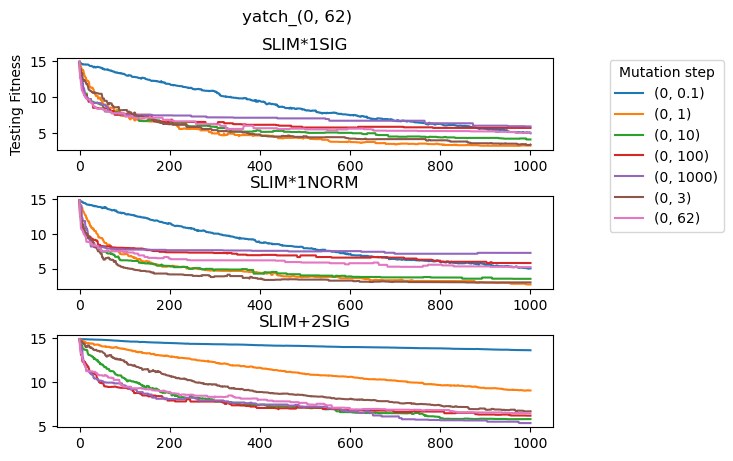

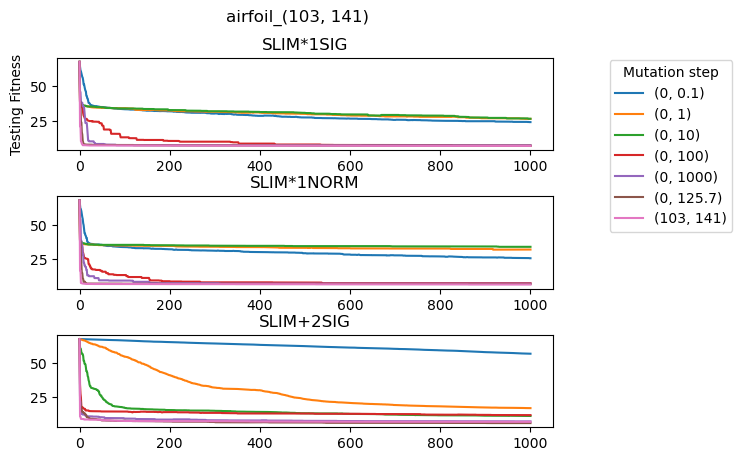

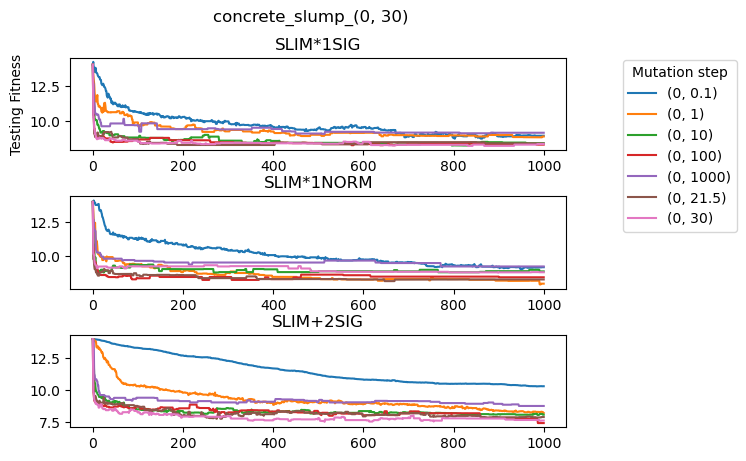

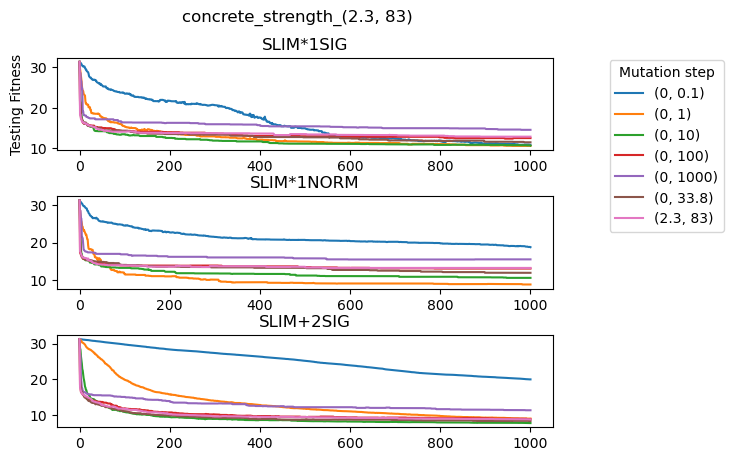

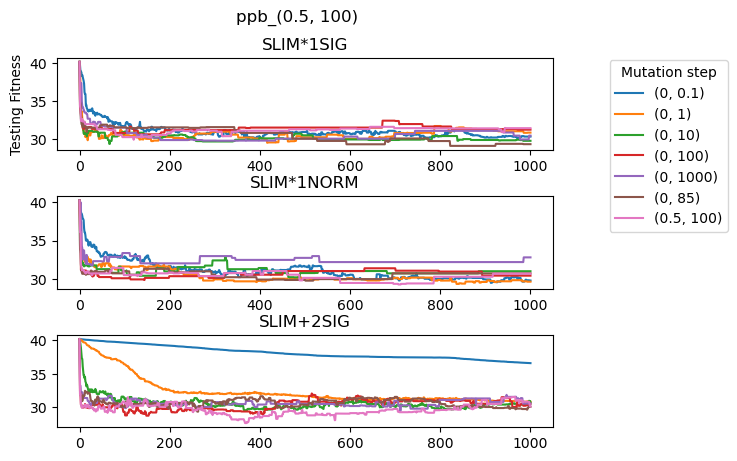

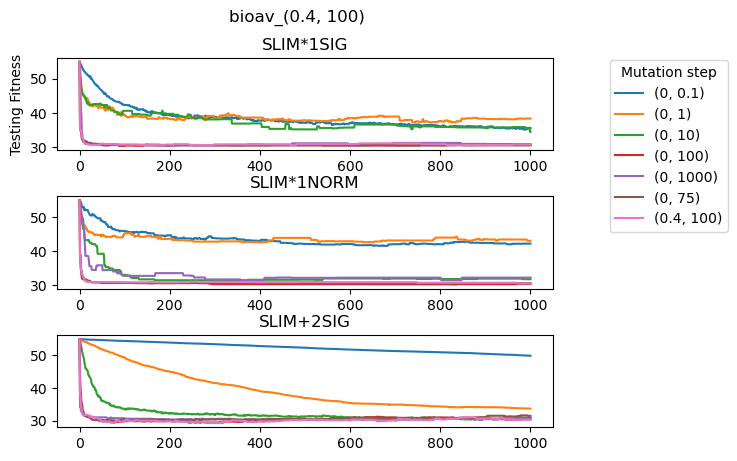

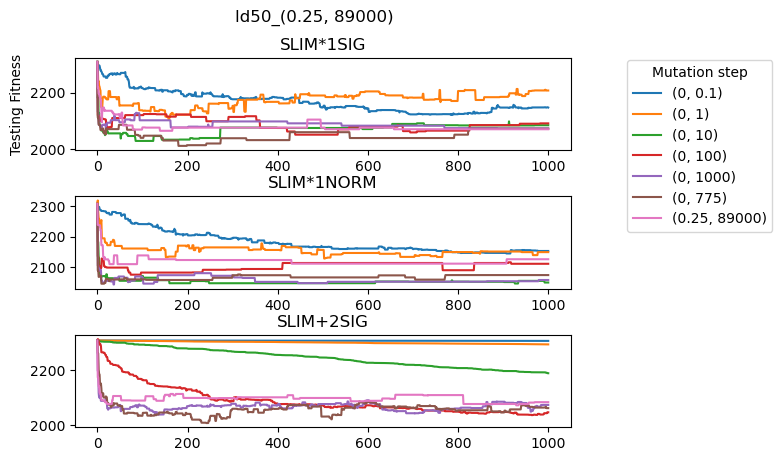

In [16]:
for dataset in data['dataset'].unique():
    
    grouped = data.query("dataset == @dataset") \
    [['generation', 'training_fitness', 'test_fitness', 'elite_size', 'algo']].groupby(['generation', 'algo']).median()
    
    if not grouped.values.shape[0] == 0:
    
        grouped.reset_index(inplace = True)

        
        gs = gridspec.GridSpec(3, 1)
        gs.update( wspace=0.6, hspace =  0.5)
        pl.figure()

        plt.suptitle(dataset + '_' + str(data_info[dataset]))

        for algo_ in list(filter(lambda x: algorithms[0] in x, grouped.algo.unique())):
            ax1 = pl.subplot(gs[0, 0]) 
            pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['test_fitness'], label = algo_.split('_')[-1])
            ax1.set_ylabel('Testing Fitness')
            ax1.set_title(algorithms[0])
            ax1.legend(bbox_to_anchor=(1.1, 1.05), title = 'Mutation step')
            
        for algo_ in list(filter(lambda x: algorithms[1] in x, grouped.algo.unique())):
            ax2 = pl.subplot(gs[1, 0]) 
            pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['test_fitness'], label = algo_.split('_')[-1])
#                     ax2.set_ylabel('Testing Fitness')
            ax2.set_title(algorithms[1])
            

        for algo_ in list(filter(lambda x: algorithms[2] in x, grouped.algo.unique())):
            ax3 = pl.subplot(gs[2, 0]) 
            pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['test_fitness'], label = algo_.split('_')[-1])
#                     ax3.set_ylabel('Testing Fitness')
            ax3.set_title(algorithms[2])
            

        plt.show()

In [17]:
data.seed.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

In [18]:
results = []
for algorithm in algorithms:
    for dataset in data['dataset'].unique():
        data_rank = []
        for seed_ in data.seed.unique()[:10]:
            grouped = data.query("dataset == @dataset and generation == 1000 and seed==@seed_") \
            [['generation', 'training_fitness', 'test_fitness', 'elite_size', 'algo']].groupby(['generation', 'algo']).median()
            grouped.reset_index(inplace = True)
            data_rank.append(rankdata([grouped.query("algo == @algo_")['test_fitness'].values[0] for algo_ in list(filter(lambda x: algorithm in x, grouped.algo.unique()))]))

        if not grouped.values.shape[0] == 0: 
            results.append([dataset + ' / ' + str(data_info[dataset])] + [algorithm] + np.median(data_rank, axis = 0).tolist() )


In [19]:
results

[['yatch / (0, 62)', 'SLIM*1SIG', 4.5, 2.0, 3.5, 5.5, 5.5, 2.5, 4.0],
 ['airfoil / (103, 141)', 'SLIM*1SIG', 5.0, 7.0, 5.5, 4.0, 4.0, 2.0, 3.0],
 ['concrete_slump / (0, 30)', 'SLIM*1SIG', 6.0, 6.5, 3.0, 3.5, 3.5, 4.5, 3.0],
 ['concrete_strength / (2.3, 83)',
  'SLIM*1SIG',
  3.5,
  2.0,
  2.5,
  5.0,
  7.0,
  3.5,
  4.5],
 ['ppb / (0.5, 100)', 'SLIM*1SIG', 3.5, 4.5, 4.0, 5.0, 5.0, 2.5, 4.5],
 ['bioav / (0.4, 100)', 'SLIM*1SIG', 6.0, 6.0, 6.0, 3.0, 3.0, 3.0, 2.5],
 ['ld50 / (0.25, 89000)', 'SLIM*1SIG', 6.0, 5.5, 2.0, 3.0, 5.0, 3.0, 3.0],
 ['yatch / (0, 62)', 'SLIM*1NORM', 4.0, 2.0, 3.0, 6.0, 7.0, 2.0, 5.0],
 ['airfoil / (103, 141)', 'SLIM*1NORM', 4.5, 5.5, 3.5, 4.0, 6.5, 3.0, 1.0],
 ['concrete_slump / (0, 30)', 'SLIM*1NORM', 4.0, 3.0, 3.5, 4.0, 6.0, 2.0, 4.5],
 ['concrete_strength / (2.3, 83)',
  'SLIM*1NORM',
  6.0,
  1.5,
  2.0,
  4.5,
  7.0,
  4.0,
  4.0],
 ['ppb / (0.5, 100)', 'SLIM*1NORM', 3.5, 3.5, 3.0, 3.5, 5.5, 5.0, 4.5],
 ['bioav / (0.4, 100)', 'SLIM*1NORM', 6.0, 6.5, 4.0, 2.0,

In [20]:
results_df = pd.DataFrame(results, columns = ['Dataset / Target Dimensions', 'Algorithm', '(0, 0.1)', '(0, 1)', '(0, 10)', '(0, 100)', '(0, 1000)', '(min target, max target)', '(0, median)'])
results_df.set_index(['Dataset / Target Dimensions', 'Algorithm'], inplace = True, drop = True)
results_df.sort_index(inplace = True)

In [21]:
results_df

(0, 0.1)  (0, 1)  (0, 10)  (0, 100)  \
Dataset / Target Dimensions   Algorithm                                         
airfoil / (103, 141)          SLIM*1NORM       4.5     5.5      3.5       4.0   
                              SLIM*1SIG        5.0     7.0      5.5       4.0   
                              SLIM+2SIG        7.0     6.0      5.0       1.5   
bioav / (0.4, 100)            SLIM*1NORM       6.0     6.5      4.0       2.0   
                              SLIM*1SIG        6.0     6.0      6.0       3.0   
                              SLIM+2SIG        7.0     6.0      4.0       3.0   
concrete_slump / (0, 30)      SLIM*1NORM       4.0     3.0      3.5       4.0   
                              SLIM*1SIG        6.0     6.5      3.0       3.5   
                              SLIM+2SIG        7.0     4.0      2.5       4.0   
concrete_strength / (2.3, 83) SLIM*1NORM       6.0     1.5      2.0       4.5   
                              SLIM*1SIG        3.5     2.0      2.5       5.0   
                              SLIM+2SIG        7.0     3.5      1.0       5.0   
ld50 / (0.25, 89000)          SLIM*1NORM       6.0     5.0      3.5       3.5   
                              SLIM*1SIG        6.0     5.5      2.0       3.0   
                              SLIM+2SIG        7.0     6.0      5.0       2.0   
ppb / (0.5, 100)              SLIM*1NORM       3.5     3.5      3.0       3.5   
                              SLIM*1SIG        3.5     4.5      4.0       5.0   
                              SLIM+2SIG        6.5     4.5      3.0       3.0   
yatch / (0, 62)               SLIM*1NORM       4.0     2.0      3.0       6.0   
                              SLIM*1SIG        4.5     2.0      3.5       5.5   
                              SLIM+2SIG        7.0     6.0      3.5       3.0   

                                          (0, 1000)  (min target, max target)  \
Dataset / Target Dimensions   Algorithm                                         
airfoil / (103, 141)          SLIM*1NORM        6.5                       3.0   
                              SLIM*1SIG         4.0                       2.0   
                              SLIM+2SIG         3.5                       2.0   
bioav / (0.4, 100)            SLIM*1NORM        4.0                       3.5   
                              SLIM*1SIG         3.0                       3.0   
                              SLIM+2SIG         2.0                       3.5   
concrete_slump / (0, 30)      SLIM*1NORM        6.0                       2.0   
                              SLIM*1SIG         3.5                       4.5   
                              SLIM+2SIG         6.0                       1.5   
concrete_strength / (2.3, 83) SLIM*1NORM        7.0                       4.0   
                              SLIM*1SIG         7.0                       3.5   
                              SLIM+2SIG         6.0                       2.0   
ld50 / (0.25, 89000)          SLIM*1NORM        3.5                       3.0   
                              SLIM*1SIG         5.0                       3.0   
                              SLIM+2SIG         4.0                       2.5   
ppb / (0.5, 100)              SLIM*1NORM        5.5                       5.0   
                              SLIM*1SIG         5.0                       2.5   
                              SLIM+2SIG         2.5                       4.0   
yatch / (0, 62)               SLIM*1NORM        7.0                       2.0   
                              SLIM*1SIG         5.5                       2.5   
                              SLIM+2SIG         2.0                       3.5   

                                          (0, median)  
Dataset / Target Dimensions   Algorithm                
airfoil / (103, 141)          SLIM*1NORM          1.0  
                              SLIM*1SIG           3.0  
                              SLIM+2SIG           3.0  
bioav / (0.4, 100)            SLIM

In [22]:
# results_df[['(0, 0.1)', '(0, 1)', '(0, 10)', '(0, 100)', '(0, 1000)']] = results_df[['(0, 0.1)', '(0, 1)', '(0, 10)', '(0, 100)', '(0, 1000)']].apply(lambda x: round(x, 2))

In [23]:
print(results_df.to_latex())

\begin{tabular}{llrrrrrrr}
\toprule
 &  & (0, 0.1) & (0, 1) & (0, 10) & (0, 100) & (0, 1000) & (min target, max target) & (0, median) \\
Dataset / Target Dimensions & Algorithm &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{3}{*}{airfoil / (103, 141)} & SLIM*1NORM & 4.500000 & 5.500000 & 3.500000 & 4.000000 & 6.500000 & 3.000000 & 1.000000 \\
 & SLIM*1SIG & 5.000000 & 7.000000 & 5.500000 & 4.000000 & 4.000000 & 2.000000 & 3.000000 \\
 & SLIM+2SIG & 7.000000 & 6.000000 & 5.000000 & 1.500000 & 3.500000 & 2.000000 & 3.000000 \\
\cline{1-9}
\multirow[t]{3}{*}{bioav / (0.4, 100)} & SLIM*1NORM & 6.000000 & 6.500000 & 4.000000 & 2.000000 & 4.000000 & 3.500000 & 1.000000 \\
 & SLIM*1SIG & 6.000000 & 6.000000 & 6.000000 & 3.000000 & 3.000000 & 3.000000 & 2.500000 \\
 & SLIM+2SIG & 7.000000 & 6.000000 & 4.000000 & 3.000000 & 2.000000 & 3.500000 & 2.000000 \\
\cline{1-9}
\multirow[t]{3}{*}{concrete_slump / (0, 30)} & SLIM*1NORM & 4.000000 & 3.000000 & 3.500000 & 4.000000 & 6.000000 & 2.000000 & 4.